## Multiple Linear Regression and Regression Error Metrics

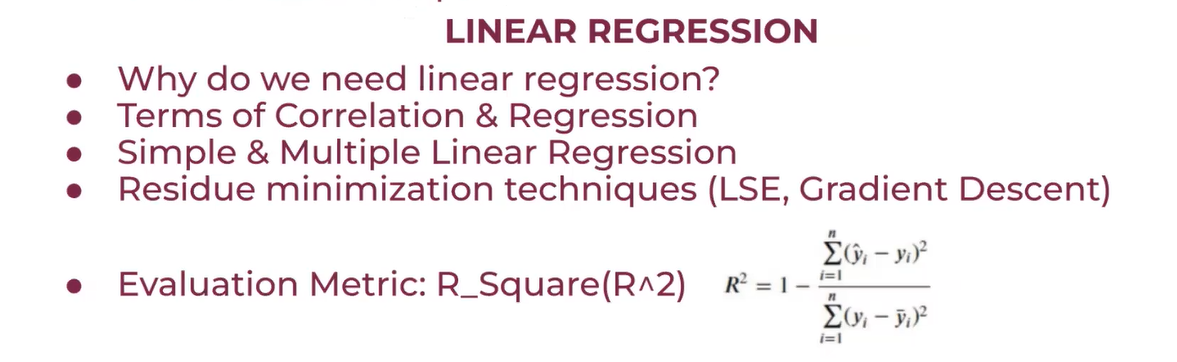
https://www.datacamp.com/tutorial/essentials-linear-regression-python
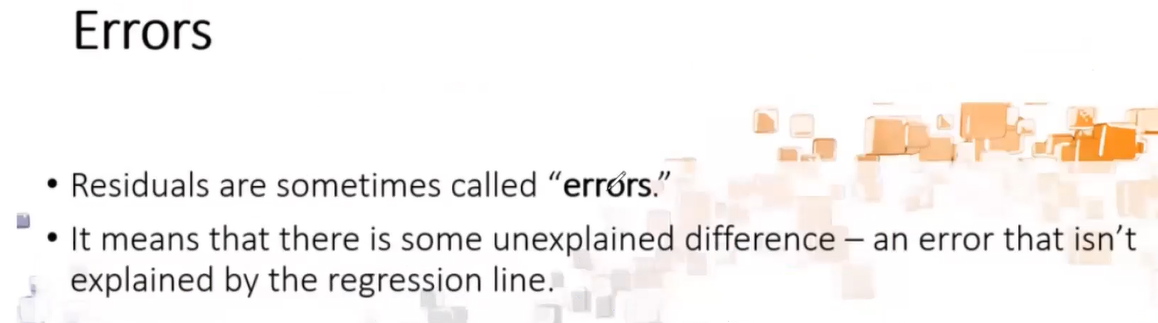
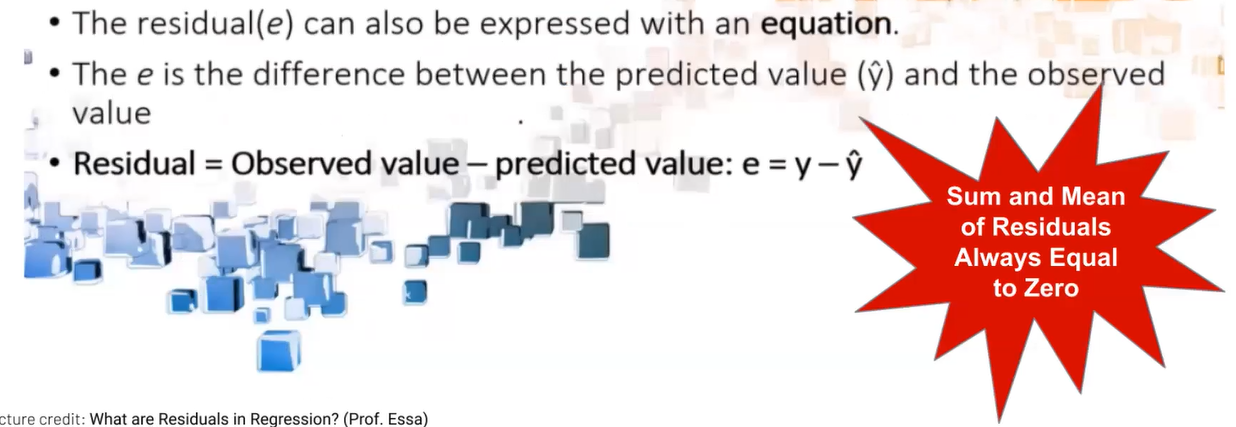
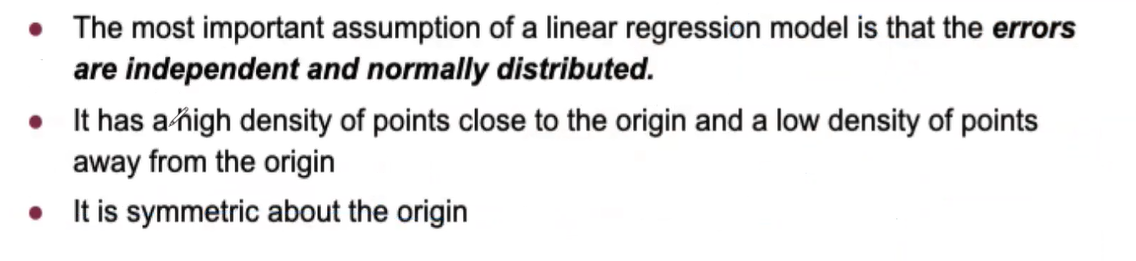
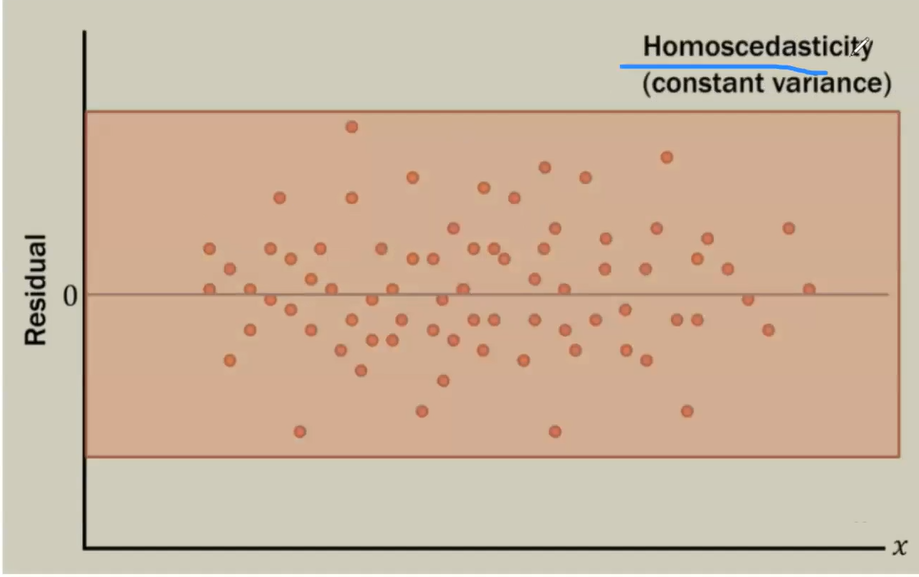

# Regression Error Metrics
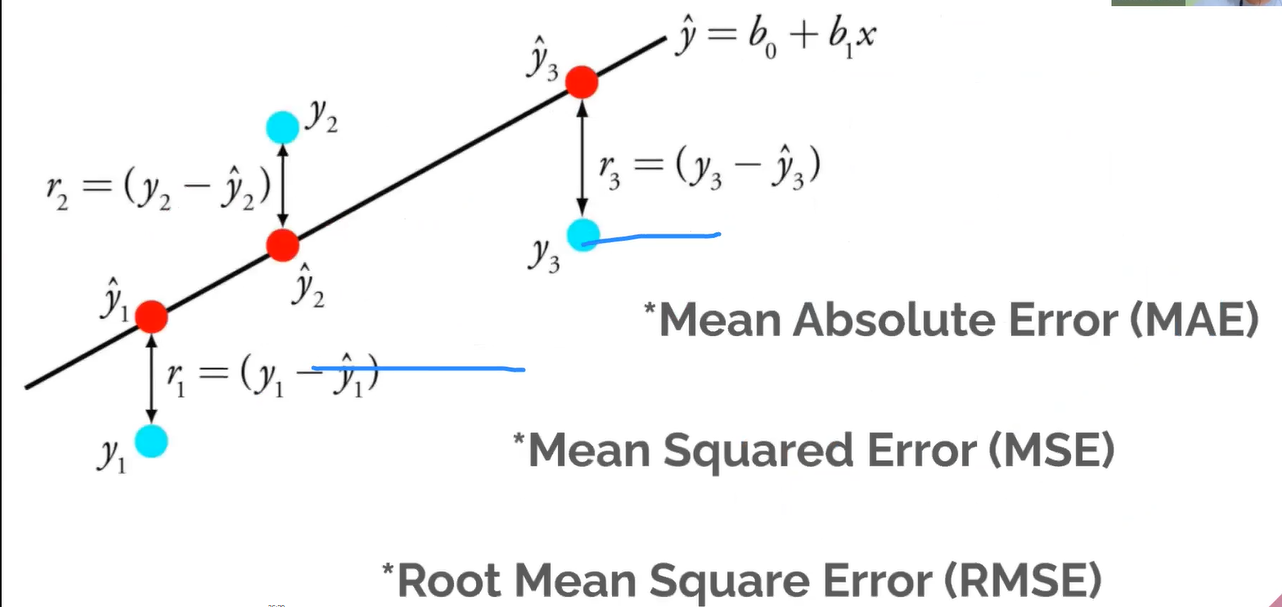
<br>
https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=There%20are%20three%20error%20metrics,Mean%20Absolute%20Error%20(MAE)
> The MSE metric is difficult to interpret. However, it is used to compare models. The best metric to evaluate the model is RMSE. RMSE is useful when large errors are undesired.
> While r2 score is an evaluation metric, mae,mse and rmse are error metrics.
> So keep in mind, we aim to minimize errors.

Q: How to evaluate linear regression models?
A: With R2 Score and RMSE.<br>

**Machine Learning with Python**
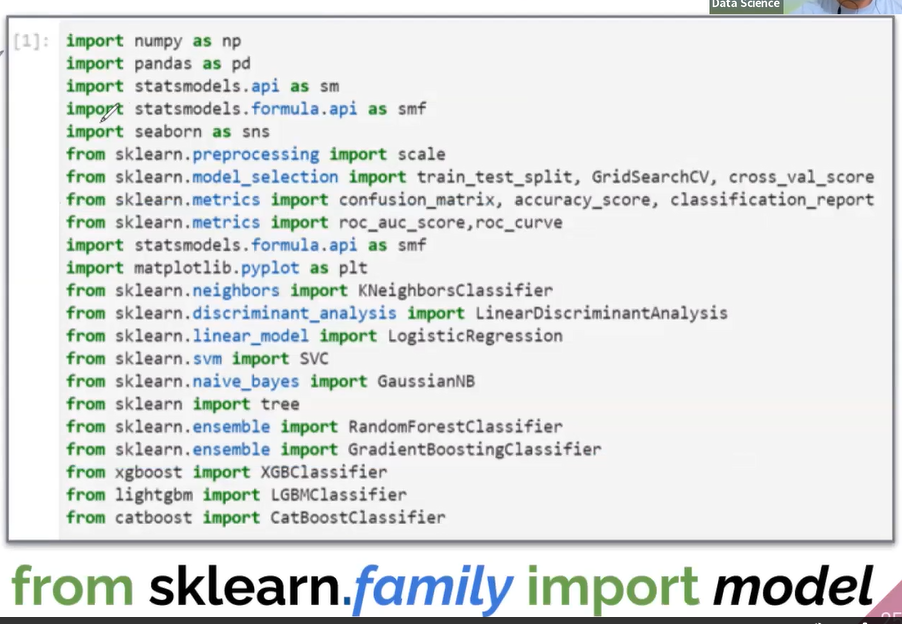

# Multiple Linear Regression

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("../Session_1/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### A brief overview of outleir values according to mean and std values

In [6]:
print(np.mean([100, 110, 120, 115]))
print(np.std([100, 110, 120, 115]))

111.25
7.39509972887452


In [7]:
print(np.mean([100, 110, 120, 700]))
print(np.std([100, 110, 120, 700]))

257.5
255.57533136044253


In [8]:
print(np.mean([100, 110, 120, 900]))
print(np.std([100, 110, 120, 900]))

307.5
342.153109002388


Outlier values can be mentioned here when std and mean are close to each other or greater than std mean. Throwing outleir values varies from model to model in terms of advantage. Model can also learn from the Outliers.

## Distribution of features

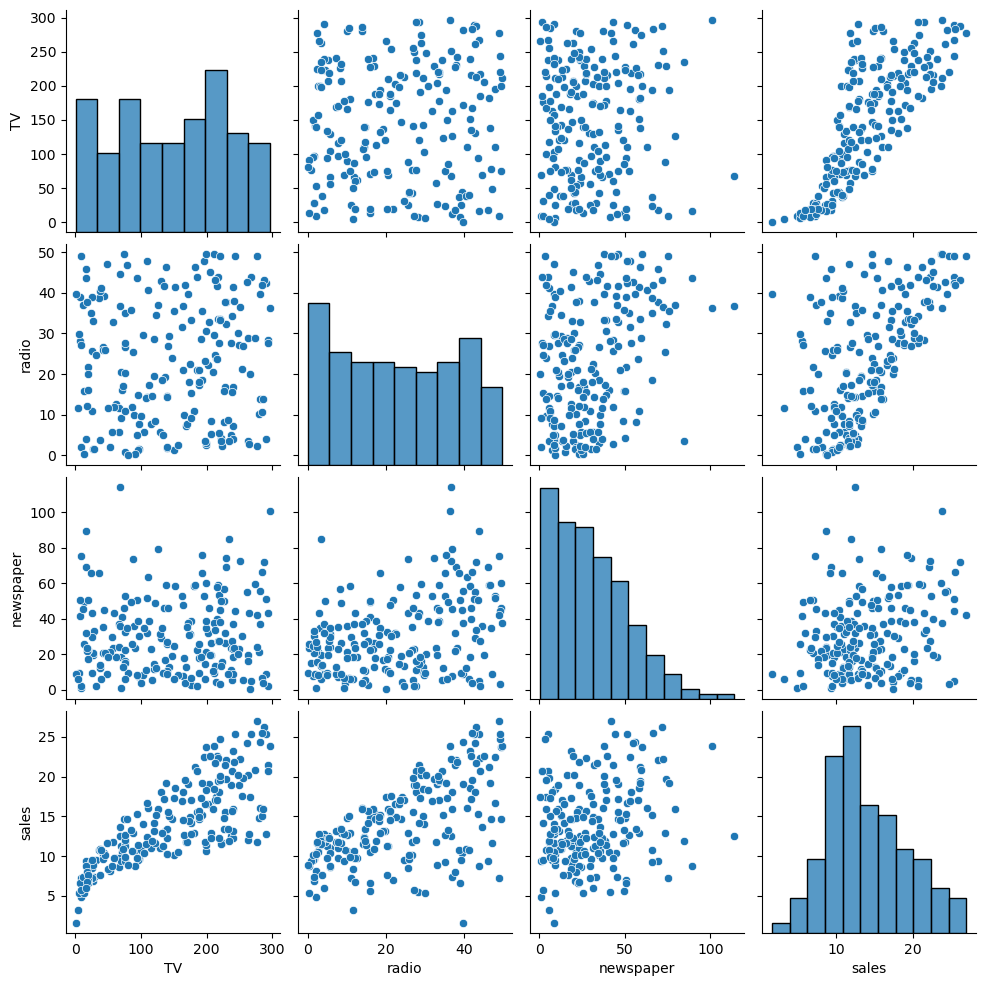

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


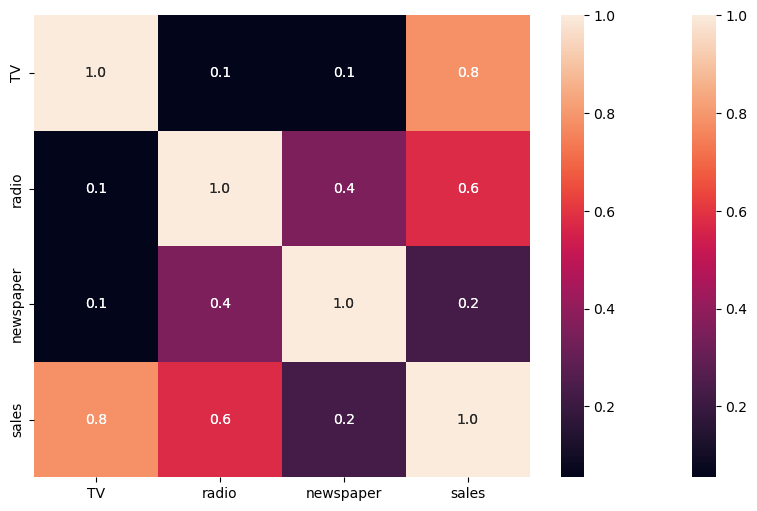

In [60]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.show()

## Train-Test Split

In [11]:
# pip install scikit-learn

In [23]:
df.sample(15)

,TV,radio,newspaper,sales
160,172.5,18.1,30.7,14.4
109,255.4,26.9,5.5,19.8
198,283.6,42.0,66.2,25.5
69,216.8,43.9,27.2,22.3
181,218.5,5.4,27.4,12.2
80,76.4,26.7,22.3,11.8
38,43.1,26.7,35.1,10.1
112,175.7,15.4,2.4,14.1
87,110.7,40.6,63.2,16.0
98,289.7,42.3,51.2,25.4


In [20]:
X = df.drop(columns ="sales") # X = df[["TV", "radio", "newspaper"]]  
y = df["sales"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [24]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random_state = 42 gives the same test set

dict1 = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}

for key, value in dict1.items():
    print(f"{key:>20}\n\n {value}")  # {i:< 20} align 
    print(value.shape[0], "rows")
    print(30*"*")

             X_train

         TV  radio  newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]
160 rows
******************************
              X_test

         TV  radio  newspaper
95   163.3   31.6       52.9
15   195.4   47.7       52.9
30   292.9   28.3       43.2
158   11.7   36.9       45.2
128  220.3   49.0        3.2
115   75.1   35.0       52.7
69   216.8   43.9       27.2
170   50.0   11.6       18.4
174  222.4    3.4       13.1
45   175.1   22.5       31.5
66    31.5   24.6        2.2
182   56.2    5.7       29.7
165  234.5    3.4       84.8
78     5.4   29.9        9.4
186  139.5    2.1       26.6
177  170.2    7.8       35.2
56     7.3   28.1       41.4
152  197.6   23.3   

## Model Fitting and Compare Actual and Predicted Labels

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [33]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [34]:
model.intercept_

2.979067338122629

In [44]:
def coefficients(model):
    coefficients = pd.DataFrame(model.coef_, index = X.columns, columns=['Coefficient'])
    return coefficients

In [45]:
def model_equation(model):
    equation = ""
    counter = 1
    for i in zip(coefficients(model).Coefficient.values, coefficients(model).index):
            equation += str(i[0]) +" * "+ str(i[1])
            if counter < len(coefficients(model).Coefficient.values):
                equation += " + "
                counter += 1
    print(equation + f" + {model.intercept_}")

In [46]:
coefficients(model)

,Coefficient
TV,0.044730
radio,0.189195
newspaper,0.002761


In [48]:
model_equation(model) 

0.044729517468716326 * TV + 0.18919505423437655 * radio + 0.0027611143413671757 * newspaper + 2.979067338122629


In [35]:
# y_pred = b3 * TV + b2 * radio + b3 * newspaper + b0

In [40]:
X_test.loc[95]

TV           163.3
radio         31.6
newspaper     52.9
Name: 95, dtype: float64

In [49]:
sum(X_test.loc[95] * model.coef_) + model.intercept_  # predicted value

16.408024203228628

In [50]:
y_test.loc[95]  # actual value

16.9

In [55]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [56]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


In [57]:
result_sample = comparing.head(25)
result_sample

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


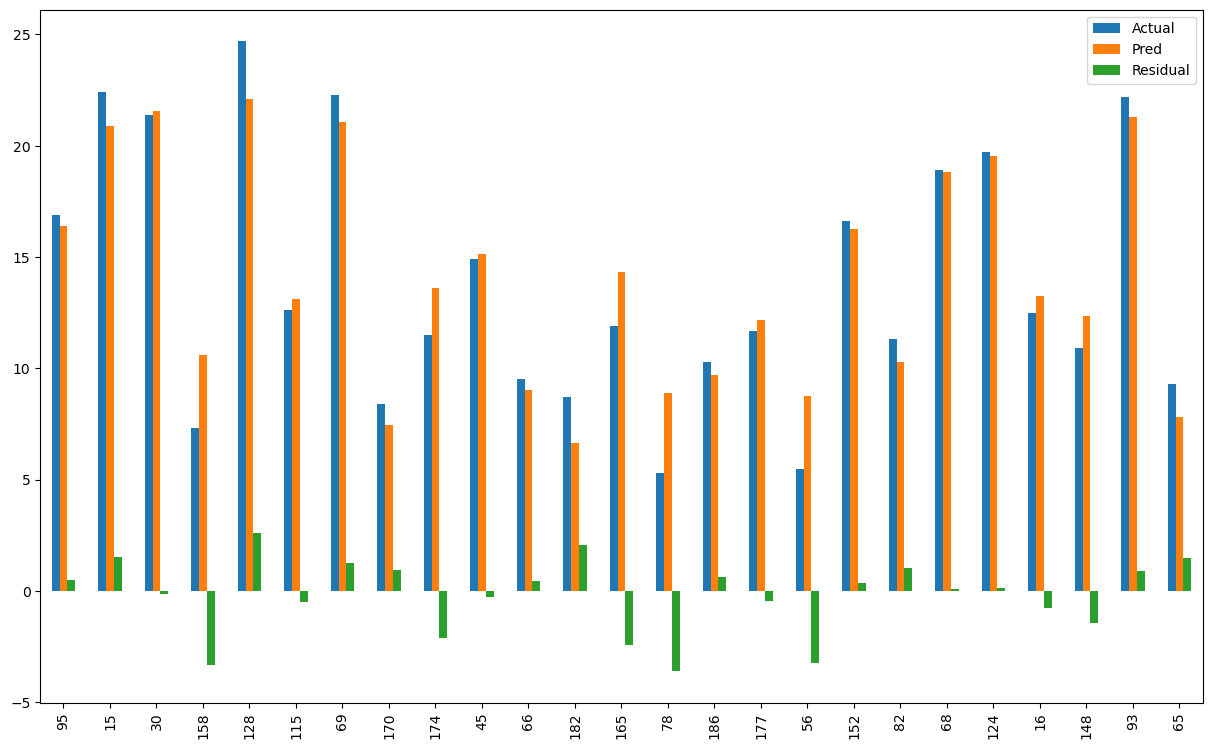

In [58]:
result_sample.plot(kind ="bar", figsize=(15,9))
plt.show()

## Error Metrics

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [62]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.899438024100912

> Sales are explained by tvi radio and newspaper 89% of the time. There is an 11% part that our model cannot explain. The success rate is 89%. 

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mae

1.4607567168117603

In [64]:
mse = mean_squared_error(y_test, y_pred)
mse

3.174097353976104

In [65]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.7815996615334502

In [66]:
sales_mean = df["sales"].mean()
sales_mean

14.022500000000003

In [67]:
mae / sales_mean  # 10% error is made. We will use this metric for model comparison.

0.10417234564533857

In [70]:
rmse / sales_mean  # 12% error is made

0.12705292647769298

## Adjusted R2 score 

https://towardsdatascience.com/demystifying-r-squared-and-adjusted-r-squared-52903c006a60

In [73]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations  
    p = X.shape[1]-1 # number of independent variables  
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [74]:
X.shape, X.shape[1]

((200, 3), 3)

In [76]:
adj_r2(y_test, y_pred, X)

0.898417090335439

In [77]:
r2_score(y_test, y_pred)

0.899438024100912

> When we increase the number of features, we see that the scores decrease. We need to add observation to balance this. In linear regression problems, r2 score gets better as you add features. To prevent this, the adjusted r2 score is evaluated.

## What is the concept of punishment for RMSE error metric?

In [80]:
variables = {"Actual": [1000, 2000, 3000, 4000, 5000], "pred": [1100, 2200, 3200, 4200, 5300]}  # 6000

In [81]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [82]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)

In [83]:
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200
3,4000,4200,200
4,5000,5300,300


In [84]:
# mae
df_2.residual.sum()/5 

200.0

In [85]:
# rmse
((df_2.residual**2).sum()/5)**0.5 

209.76176963403032

## Evaluation Model

In [86]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [87]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.899438024100912
MAE 		: 1.4607567168117603
MSE 		: 3.174097353976104
RMSE 		: 1.7815996615334502


> As a general approach, we want our model to generalize. To understand this, we will compare the scores we get from the y_test and y_train sets. We trained our model and looked at our scores on the test. Now we will look at the prediction made by our model based on the data it sees. Let's compare the results of y_pred and y_train_pred:

In [88]:
y_train_pred = model.predict(X_train)

In [90]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8957008271017818
MAE 		: 1.1984678961500137
MSE 		: 2.705129423081414
RMSE 		: 1.644727765644337


## Is data suitable for linear regression?

https://stats.stackexchange.com/questions/12262/what-if-residuals-are-normally-distributed-but-y-is-not

Lineer regresyon varsayımları: Residualler normal dağılım sergilemeli

## Plotting residuals

In [91]:
residuals = y_test-y_pred

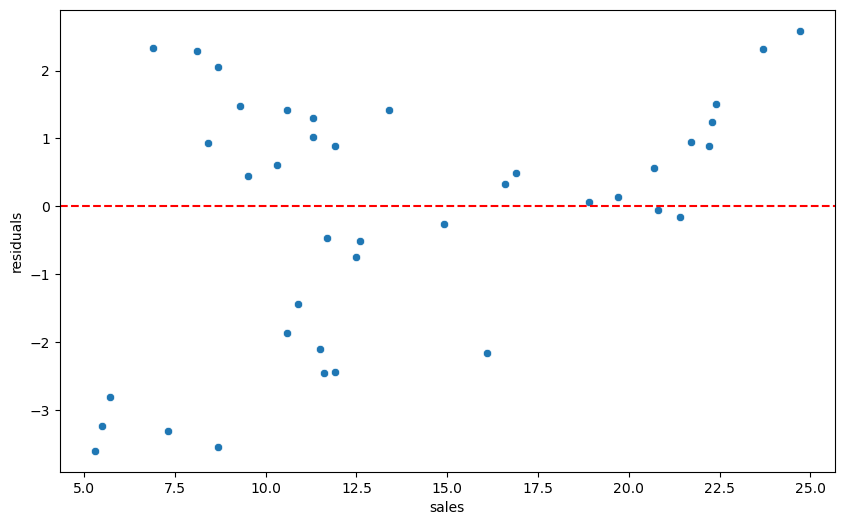

In [92]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

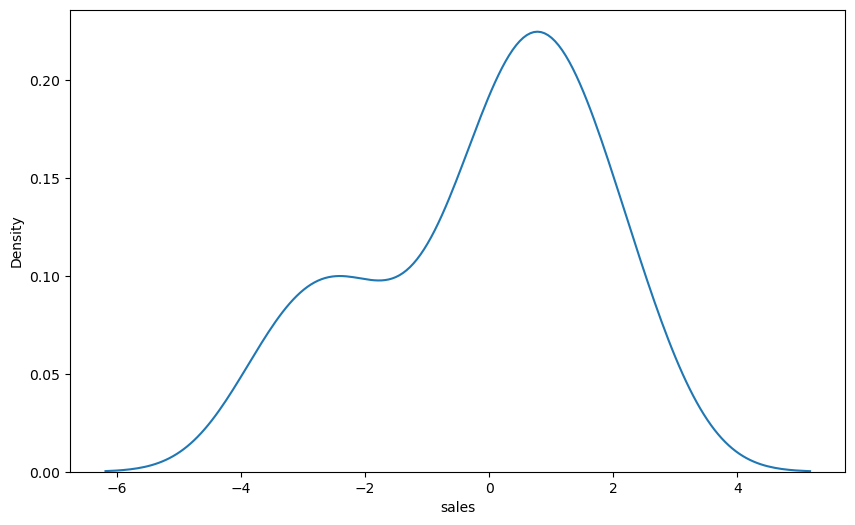

In [95]:
sns.kdeplot(residuals)
plt.show()

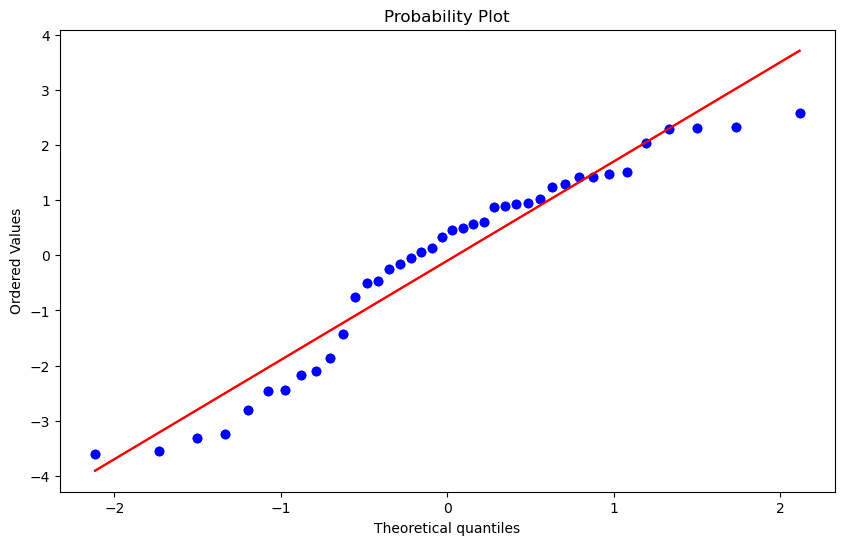

In [97]:
stats.probplot(residuals, dist ="norm", plot =plt)
plt.show()

In [98]:
from scipy.stats import skew
skew(residuals)  # shows almost normal distribution

-0.5399061927739793

In [99]:
#pip install yellowbrick

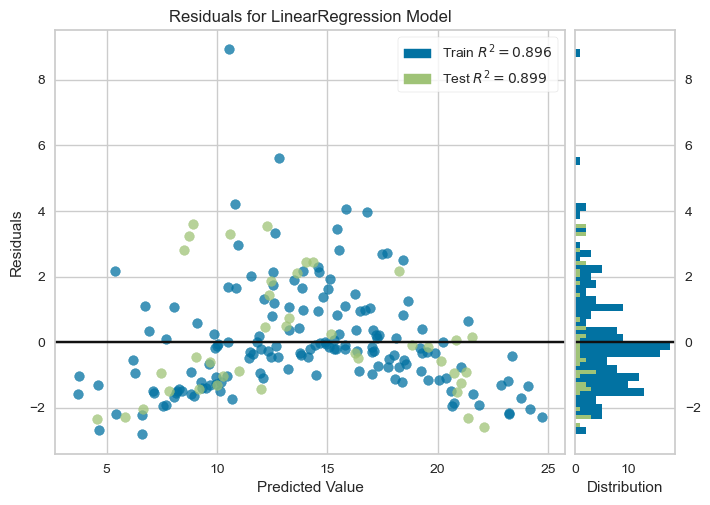

In [101]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()  # modeli tanımla
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

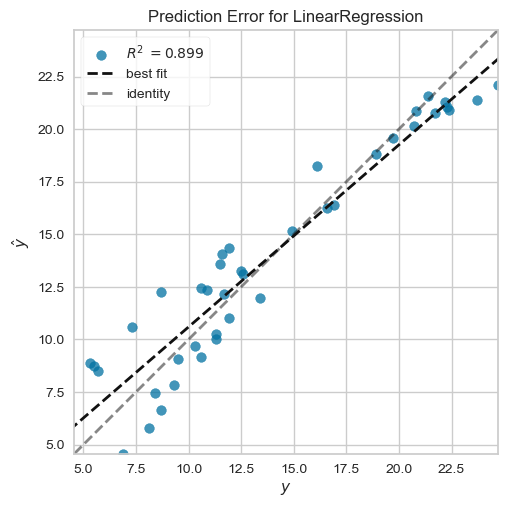

In [102]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    

## Retraining Model on Full Data

In [103]:
final_model = LinearRegression()

In [104]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [105]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [106]:
final_model.intercept_

2.9388893694594067

In [108]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [109]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [110]:
adv = [[150, 20, 15]] # 2D

In [111]:
adv

[[150, 20, 15]]

In [119]:
final_model.predict(adv)

array([13.55862413])

In [120]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [121]:
final_model.intercept_

2.9388893694594067

In [122]:
sum(final_model.coef_ * [150, 20, 15]) + final_model.intercept_

13.558624130495994

In [125]:
adv_2 = [[150, 20, 15], [160, 20, 15]]  # Let there be a 10-unit increase in TV

In [126]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [127]:
14.01627059 - 13.55862413  # The effect of a 10-unit increase in TV on sales

0.4576464599999994